In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def display (img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [33]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0)

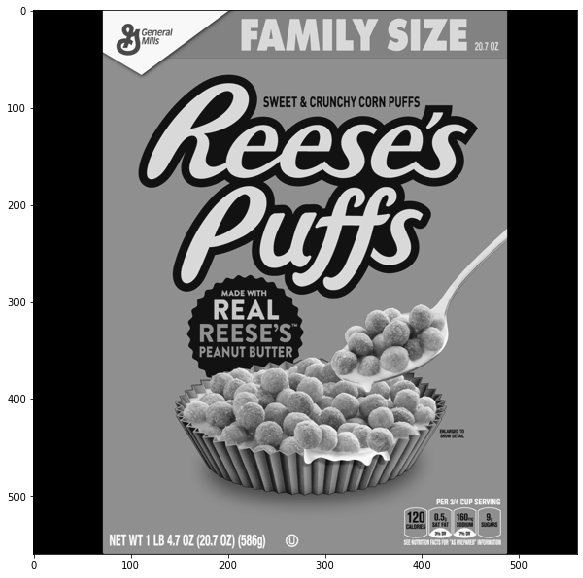

In [34]:
display(reeses)

In [35]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)

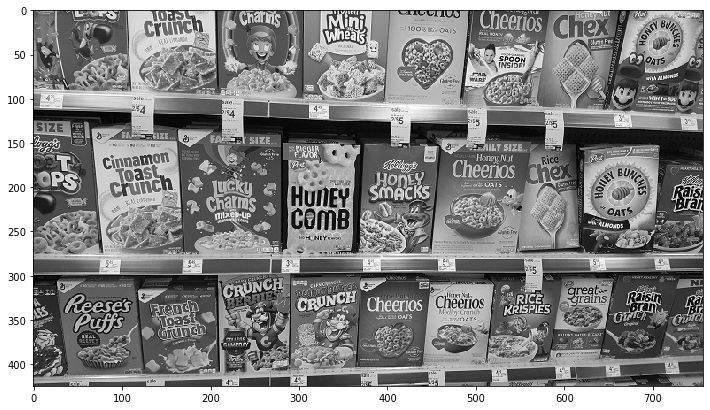

In [36]:
display(cereals)

# Brute Force with ORB 

In [37]:
orb = cv2.ORB_create()

In [38]:
# PICTURE 1
kp1, des1 = orb.detectAndCompute(reeses, None) # there is no mask

# PICTURE 2
kp2, des2 = orb.detectAndCompute(cereals, None) # there is no mask

In [39]:
bf = cv2.BFMatcher(cv.NORM_HAMMING, crossCheck=True) # default params

In [40]:
matches = bf.match(des1, des2)

In [41]:
single_match = matches[0]
single_match.distance

56.0

In [42]:
matches = sorted(matches , key=lambda x: x.distance) # sorted 

In [43]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

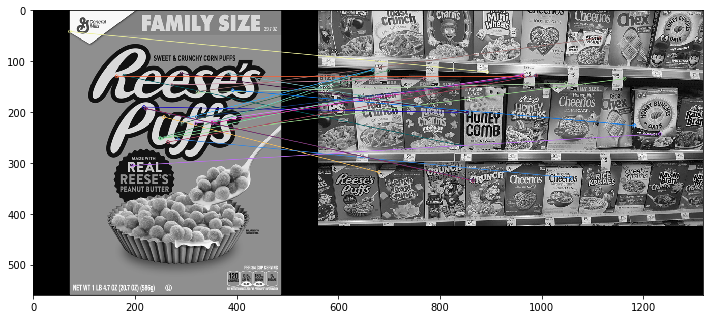

In [44]:
display(reeses_matches)

# Brute Force : SIFT 

In [46]:
sift = cv2.SIFT_create()

In [47]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [48]:
bf = cv2.BFMatcher()

In [50]:
matches = bf.knnMatch(des1, des2, k=2) # find the k best matches from des1 and des2 ,

In [53]:
# find best ration matches

good = []

for match1, match2 in matches:
    # IF MATCH 1 DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH ,LETS KEEP THE VALUE
    if match1.distance < 0.5*match2.distance:
        good.append([match1])

In [54]:
len(good)

44

In [55]:
len(matches)

1501

In [56]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

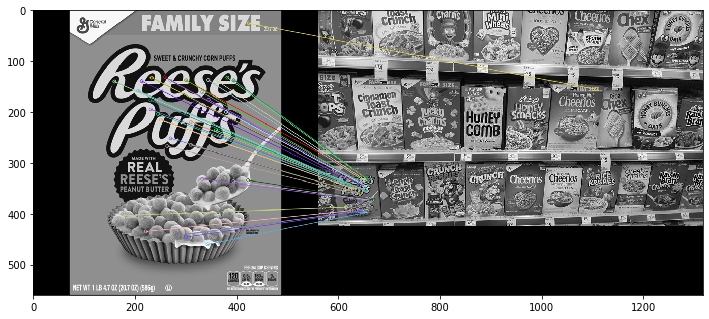

In [57]:
display(sift_matches)

# SIFT Test on Tom Holland Face

In [70]:
holland1 = cv2.imread('../DATA/tom_holland1.jpg', 0)

In [78]:
holland2 = cv2.imread('../DATA/tom_holland1.jpg', 0)

In [79]:
kp1, des1 = sift.detectAndCompute(holland1, None)
kp2, des2 = sift.detectAndCompute(holland2, None)

In [80]:
matches = bf.knnMatch(des1, des2, k=2) # find the k best matches from des1 and des2 ,

In [81]:
# find best ration matches

good = []

for match1, match2 in matches:
    # IF MATCH 1 DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH ,LETS KEEP THE VALUE
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [82]:
sift_matches = cv2.drawMatchesKnn(holland1, kp1, holland2, kp2, good, None, flags=2)

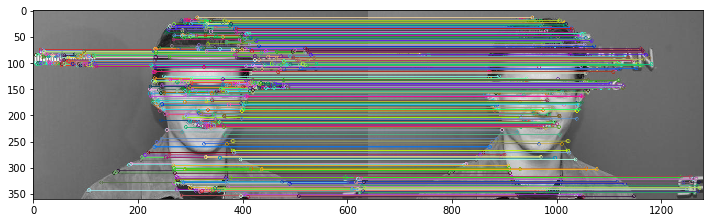

In [83]:
display(sift_matches)

# SIFT Brute Force on Mie Goreng Sedaap

In [84]:
mie1 = cv2.imread('../DATA/mie_goreng1.jpg', 0)
mie2 = cv2.imread('../DATA/mie_goreng2.jpg', 0)


In [87]:
kp1, des1 = sift.detectAndCompute(mie1, None)
kp2, des2 = sift.detectAndCompute(mie2, None)

In [88]:
matches = bf.knnMatch(des1, des2, k=2) # find the k best matches from des1 and des2 ,

In [98]:
# find best ration matches

good = []

for match1, match2 in matches:
    # IF MATCH 1 DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH ,LETS KEEP THE VALUE
    if match1.distance < 0.85*match2.distance:
        good.append([match1])

In [99]:
sift_matches = cv2.drawMatchesKnn(mie1, kp1, mie2, kp2, good, None, flags=2)

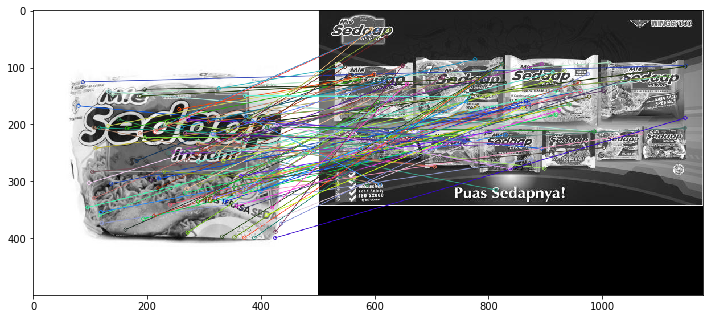

In [100]:
display(sift_matches)

# SIFT Brute force on Koko Krunch

In [101]:
koko1 = cv2.imread('../DATA/koko_krunch1.jpg', 0)
koko2 = cv2.imread('../DATA/koko_krunch2.jpg', 0)

In [104]:
kp1, des1 = sift.detectAndCompute(koko1, None)
kp2, des2 = sift.detectAndCompute(koko2, None)

In [105]:
matches = bf.knnMatch(des1, des2, k=2) # find the k best matches from des1 and des2 ,

In [126]:
# find best ration matches

good = []

for match1, match2 in matches:
    # IF MATCH 1 DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH ,LETS KEEP THE VALUE
    if match1.distance < 0.30*match2.distance:
        good.append([match1])

In [127]:
sift_matches = cv2.drawMatchesKnn(koko1, kp1, koko2, kp2, good, None, flags=2)

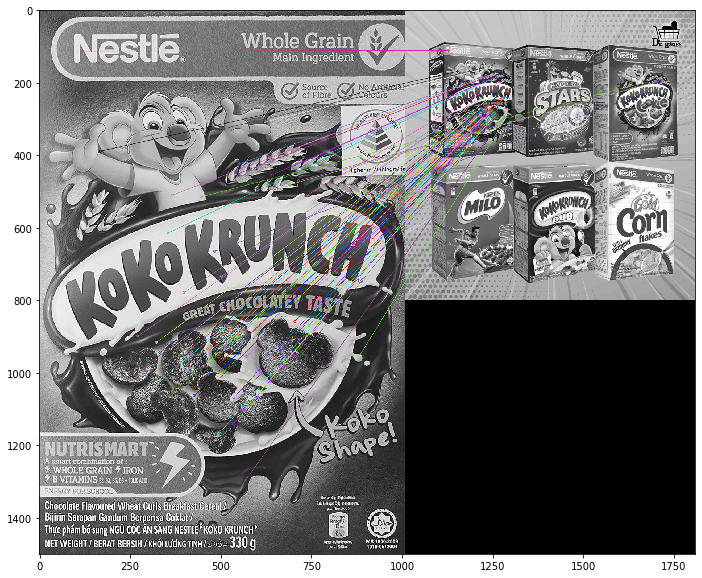

In [128]:
display(sift_matches)

# That's it. Moving on to the next Algorithm :)

# FLANN 

In [160]:
sift = cv2.SIFT_create()

In [161]:
# PICTURE 1
kp1, des1 = sift.detectAndCompute(reeses, None) # there is no mask

# PICTURE 2
kp2, des2 = sift.detectAndCompute(cereals, None) # there is no mask

In [162]:
# Flann much faster. it's nott gonna best possible matches, it finds best general good matches
# we can play with flann parameter to increase precision. but sometimes it slowing down the algorithms. 
# This is good matching ,but not necessarily the best

In [163]:
# FLANN
FLANN_INDEX_KDTREE = 0

index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)

search_params = dict(checks=50)

In [164]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [165]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

In [166]:
matchesMask = [[0,0] for i in range(len(matches))] # additional parameters create [0,0] in the length of matche

In [168]:
# good = []

# for match1, match2 in matches:
#     if match1.distance < 0.75*match2.distance:
#         good.append([match1])
        


for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1, 0]

        

        

In [172]:
draw_params = dict(matchColor=(0,255,0),singlePointColor=(255,0,0), matchesMask=matchesMask, flags=2)

In [173]:
# flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2) # old 
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params) 

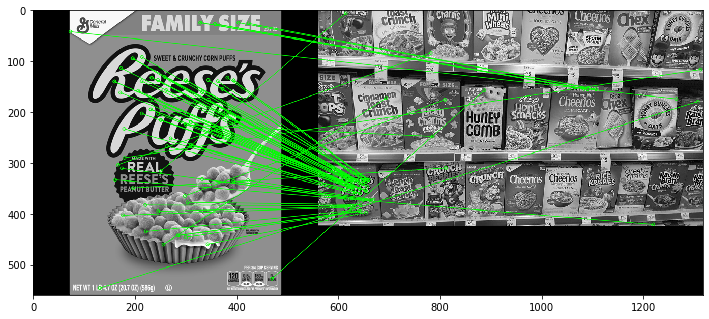

In [174]:
display(flann_matches)